# Boston Housing Price Prediction: AutoFeature Regression

The purpose of this notebook is to explore using AutoFeature Regression and Feature Selection from the Python package autofeat. To test this tool, it will be used on the Boston housing dataset that is a popular dataset for learning linear regression and can be accessed through scklearn.datasets import load_boston.

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

    Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000(USD)
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in 1000's(USD)

We can see that the input features are quite a variety and have a mixture of units. 

### Ethical Considerations:
This dataset has a feature that is based on the racial demographics of a neighborhood. This really should have no logical reason for affecting the price of the house in an area and this feature will be removed from the working dataset. As well, if it were left in and a model gave that feature more weight it would lead to more racial bias in the real world. For instance, if it predicted values of homes lower based on a racial demographic, that would unfairly and dispropotionately affect people of those demographics since it would mean their houses are predicted to be lower in value and buyers would offer lower bids resulting lower sale prices and the cycle continues create racial bias. Since the race of people does not affect the crime, income or proximity to geographical features, it is totally inappropriate for this study. As stated previously, it will be dropped from the dataset used for analysis. 


### AutoFeat

Autofeat will try different transformations and combinations of variables to come up with a set of features that it believes will perform the best. 

As well, autofeat can also then select out the features based on covariance and noise to narrow down the features to only the ones that fit its criteria.

### Action Steps:

1. Train a linear regression model on all of the data and test model as the baseline for comparison.
    
2. Use autofeat for feature selection with the raw data. Perform linear regression and compare to baseline.
    
3. Use autofeat to do 1 step of transformation and combinations. Compare new features to raw features.
    
4. Use new features from 1 step of engineering for linear regression and compare to baseline results.
    
5. Use autofeat to do 2 steps of transformation and combinations. Compare new features to raw features.
    
6. Use new features from 2 steps of engineering for linear regression and compare to 1-step and baseline.
    
7. Compare all results and discuss next steps


### Quick Summary of Results from Linear Regression Analysis:
**4 Features Linear Regression** - testing R-squared: **0.66**

**Raw Data All Features Linear Regression** - testing R-squared: **0.71**

**Raw Data FeatureSelector Linear Regression** - testing R-squared: **0.71**

**1-Step Transformed Data AutoRegressor Linear Regression** - test R-squared: **0.76**

**2-Step Transformed Data AutoRegressor Linear Regression** - test R-squared: **0.84**

In [1]:
# import the packages for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from autofeat import FeatureSelector, AutoFeatRegressor


## Import the Boston Housing Data

In [2]:
# import the dataset
boston = load_boston()

# the description of the dataset
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\dagar\anaconda3\envs\btc_pred_py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [3]:
# view the feature_names
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
# create a dataframe from the features
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# remove the B column for ethical reasons
boston_df = boston_df.drop(columns=['B'])

In [6]:
# add the Price (MEDV) target column
boston_df['MEDV'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.shape

(506, 13)

In [8]:
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

### Quick Exploratory Data Analysis:
The CRIM feature seems a bit suspicious since the 75% is 3.677 but the max is 88.97. The max could be an error value since it seems unreasonably high. 

The RM feature seems like it should not have a float value for the min nor the max since it rooms are a discrete number.

The AGE feature has a max value of 100. This means that there is an area where all the owner occupied houses were built prior to 1940. That is somewhat surprising, but is within reason.

The pupil teacher ratio (PTRATIO) looks reasonable as it ranges from 12 pupils per teacher to 22 pupils per teacher.

The max of percent lower status (LSTAT) is 37.97% which means there is a neighborhood with a lot of low income residents.

Most features look reasonable other than what has been noticed in the above explanations. By using visualizations, a lot of the oddities can be analyzed appropriately.

<Figure size 432x288 with 0 Axes>

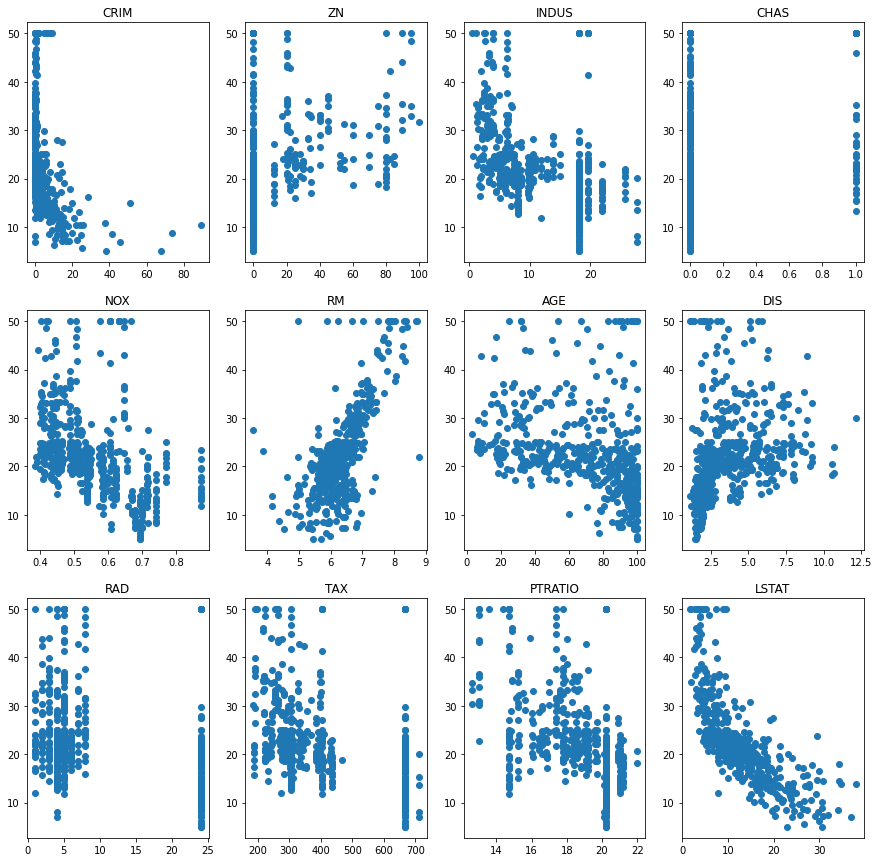

In [10]:
fig = plt.figure()


fig = plt.figure(figsize=(15,15))
axes = fig.subplots(nrows=3, ncols=4)

count = 0

for ax in axes.flatten():
    ax.scatter(boston_df.iloc[:, count], boston_df['MEDV'])
    ax.set_title(boston_df.columns[count])
    count += 1
    


plt.show()

## EDA Plot Analysis

The plots that have the most linear relationship to MEDV (target) are:
    
**RM, LSTAT, PTRATIO, and NOX**

The rest of the features do not look very linear in relationship to MEDV and do not seem to meet the 4 main requirements for a linear model:

    Linearity - linear relationship between feature and target
    Homoscedasticity - a constant variance among the residuals
    Independence - observations are independent of one another
    Normality - the distribution of target is normal
    
    
Since this is an educational exercise and is meant to test the power of autofeat, of these features will be tested for performance. But as stated, this is not going to perform the best using a linear model.

**But first, try linear regression only the features that look linear for a comparison.**

## First Linear Model with only Four Features

In [11]:
# select on the four linear features
linear_df = boston_df.loc[:, ['RM', 'LSTAT', 'PTRATIO', 'NOX']]
# create the target
target = boston_df['MEDV']

#split the data for training and test
X_train, X_test, y_train, y_test = train_test_split(linear_df, target, test_size=0.2, random_state=10)

In [13]:
# instantiate the linear model
lin_reg = LinearRegression()

# train the model
lin_reg.fit(X_train, y_train)

# make training predictions
train_preds = lin_reg.predict(X_train)

# make testing predictions
test_preds = lin_reg.predict(X_test)

# get R-squared for training
train_r2 = r2_score(y_train, train_preds)

# get R-squared for testing
test_r2 = r2_score(y_test, test_preds)

print('Training R-squared:', train_r2)
print('Testing R-squared:', test_r2)

Training R-squared: 0.6742153282622242
Testing R-squared: 0.6569320897221376


#### Analysis:
By using on the **four features** that seem to have a **linear relationship with MEDV**, it resulted in a linear model with an **R-squared of 0.66** on the testing data.

Next, create a linear regression model on all the raw data.

## Step 1: Create a Linear Regression Model for the Raw Data

In [11]:
# split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:, :-1], boston_df['MEDV'], test_size=0.3, random_state=10)

In [12]:
# instantiate a simple linear regression model
reg = LinearRegression()

# fit the model to the training data
reg.fit(X_train, y_train)

# get predictions for the training data
train_preds = reg.predict(X_train)

# get test predictions
test_preds = reg.predict(X_test)

# get R-squared value for training predictions
train_r2 = r2_score(y_train, train_preds)

# get R-squared value for testing predictions
test_r2 = r2_score(y_test, test_preds)

print(f'Training R-squared: {train_r2}')
print(f'Testing R-squared: {test_r2}')

Training R-squared: 0.7353186238319751
Testing R-squared: 0.7094491346346699


### Analysis of Linear Regression on the Raw Data

Without any feature selection or transformations, we get an R-squared value of 0.735 for the training data and 0.709 for the testing data.

This shows there is some slight overfitting to the training data, but it is close enough for now since we are simply creating a baseline for future model comparisons.

## Step 2: Auto Feature Selection with Raw Data

In [13]:
from autofeat import FeatureSelector

# instantiate the FeatureSelector
feat_sel = FeatureSelector(verbose=1)

# perform the feature selection on all the data
X = boston_df.iloc[:, :-1]
y = boston_df['MEDV']
new_feat_Xtrain = feat_sel.fit_transform(X, y)

new_feat_Xtrain.columns

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 10 features after 5 feature selection runs
[featsel] 9 features after correlation filtering
[featsel] 8 features after noise filtering


Index(['ZN', 'RM', 'NOX', 'DIS', 'CRIM', 'LSTAT', 'PTRATIO', 'CHAS'], dtype='object')

### Visualize the Feauteres Selected vs MEDV

<Figure size 432x288 with 0 Axes>

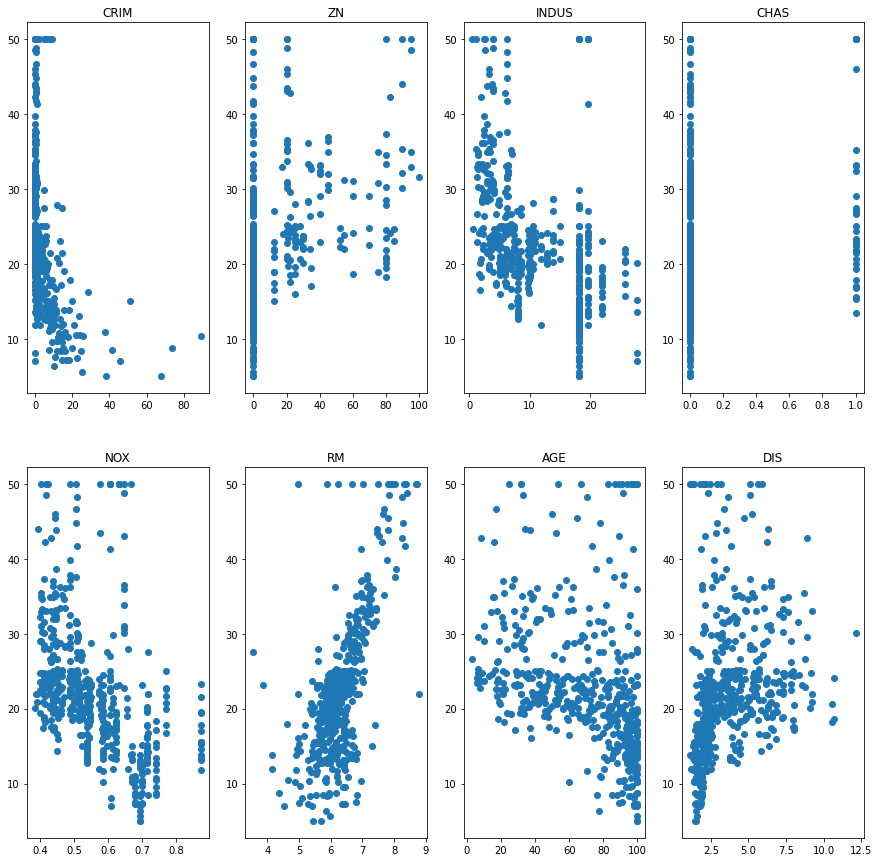

In [15]:
fig = plt.figure()


fig = plt.figure(figsize=(15,15))
axes = fig.subplots(nrows=2, ncols=4)

count = 0

for ax in axes.flatten():
    ax.scatter(X.iloc[:, count], y)
    ax.set_title(X.columns[count])
    count += 1
    


plt.show()

### Analysis of the Features Selected:
8 Features were selected out of 12 total features.

Of the 8 features, most seem to have at least some linear relationship to the MEDV target, but CHAS and ZN do not seem to have a linear relationship. 

### Try linear regresion with the selected features

In [18]:
# select only the features desired
X_train = X_train.loc[:, new_feat_Xtrain.columns]
X_test = X_test.loc[:, new_feat_Xtrain.columns]

# instantiate the linear regression model
lin_reg = LinearRegression()

# train the model
lin_reg.fit(X_train, y_train)

# make training predictions
train_preds = lin_reg.predict(X_train)

# make testing predictions
test_preds = lin_reg.predict(X_test)

# get R-squared values
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print('The training R-squared:', train_r2)
print('The testing R-Squared:', test_r2)

The training R-squared: 0.722149051669472
The testing R-Squared: 0.7078515136474637


C:\Users\dagar\anaconda3\envs\btc_pred_py37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\dagar\anaconda3\envs\btc_pred_py37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\dagar\anaconda3\envs\btc_pred_py37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


### Analysis of Feature Selection on the Raw Data:

The model that used only the features selected from autofeat performed slightly worse than the model that saw all of the data.

Here there is no advantage to using the feature selection process of autofeat.

## Step 3: Auto Regression with 1 Step Processing

In [19]:
# instantiate auto feature transformation and selection with 1 step of processing
feat_select = AutoFeatRegressor(verbose=1, feateng_steps=1)

In [20]:
new_X = feat_select.fit_transform(boston_df.iloc[:, :-2], boston_df['MEDV'])

[AutoFeat] The 1 step feature engineering process could generate up to 77 features.
[AutoFeat] With 506 data points this new feature matrix would use about 0.00 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 50 transformed features from 11 original features - done.
[feateng] Generated altogether 51 new features in 1 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 17 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 18 features after 5 feature selection runs
[featsel] 16 features after correlation filtering
[featsel] 10 features after noise filtering
[AutoFeat] Computing 4 new features.
[AutoFeat]     4/    4 new features ...done.
[AutoFeat] Final dataframe with 15 feature columns (4 new).


## View the new features created from 1 step auto regression

In [21]:
new_X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', '1/DIS', 'exp(RM)', '1/INDUS', 'DIS**3'],
      dtype='object')

In [22]:
# check which features got removed
[x for x in boston_df.columns if x not in new_X.columns]

['LSTAT', 'MEDV']

### Analysis of 1 Step AutoRegression

There are 5 new features created from the AutoRegressor: 
    
    1/DIS
    exp(RM)
    1/INDUS
    DIS**3


Only one feature was removed from the original features: 

    LSTAT

Removing LSTAT is quite surprising it has a very nice visual correlation with the MEDV target. This may be due to colinearity with other features that may make LSTAT unnecessary after the auto transformations.

## View the new transformed data plotted with the target

### 1/DIS and DIS plotted

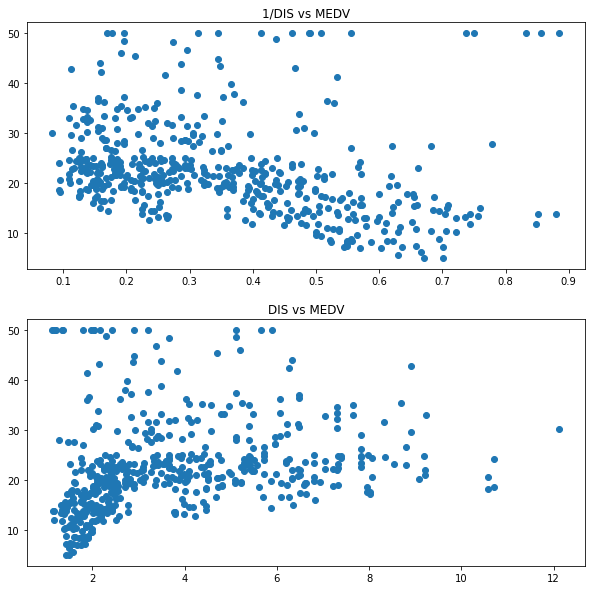

In [23]:
# create a figure for two subplots
fig, (ax1, ax2) = plt.subplots(2,figsize=(10,10))

# plot the 1/DIS vs MEDV
ax1.scatter(new_X['1/DIS'], boston_df['MEDV'])
ax1.set_title('1/DIS vs MEDV')

# plot the DIS vs MEDV
ax2.scatter(new_X['DIS'], boston_df['MEDV'])
ax2.set_title('DIS vs MEDV')

plt.show()


### exp(RM) and RM plotted

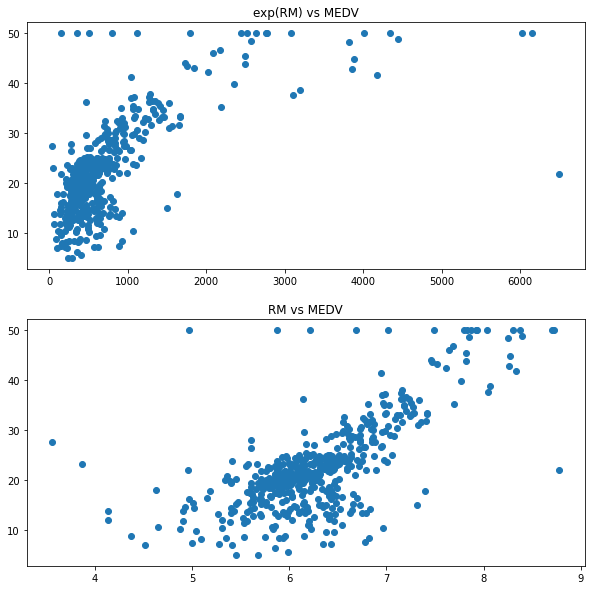

In [24]:
# create two subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

# plot exp(RM) vs MEDV
ax1.scatter(new_X['exp(RM)'], boston_df['MEDV'])
ax1.set_title('exp(RM) vs MEDV')

# plot RM vs MEDV
ax2.scatter(new_X['RM'], boston_df['MEDV'])
ax2.set_title('RM vs MEDV')

plt.show()

### 1/INDUS and INDUS plotted

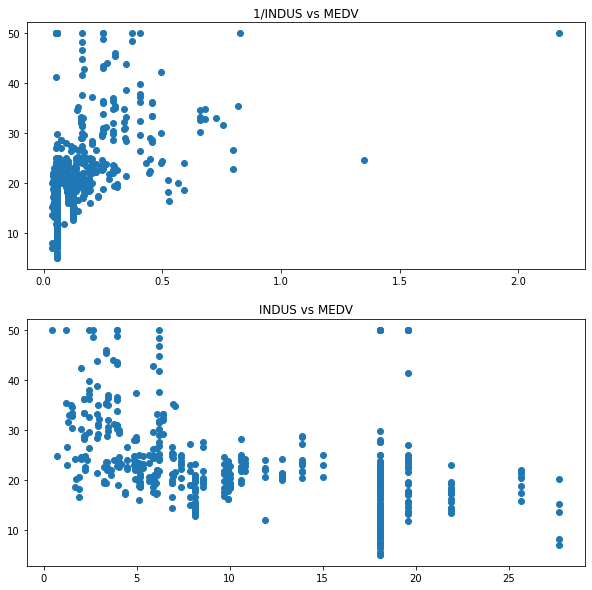

In [25]:
# create two subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

# plot 1/INDUS vs MEDV
ax1.scatter(new_X['1/INDUS'], boston_df['MEDV'])
ax1.set_title('1/INDUS vs MEDV')

# plot INDUS vs MEDV
ax2.scatter(new_X['INDUS'], boston_df['MEDV'])
ax2.set_title('INDUS vs MEDV')

plt.show()

### Plot DIS**3 vs DIS

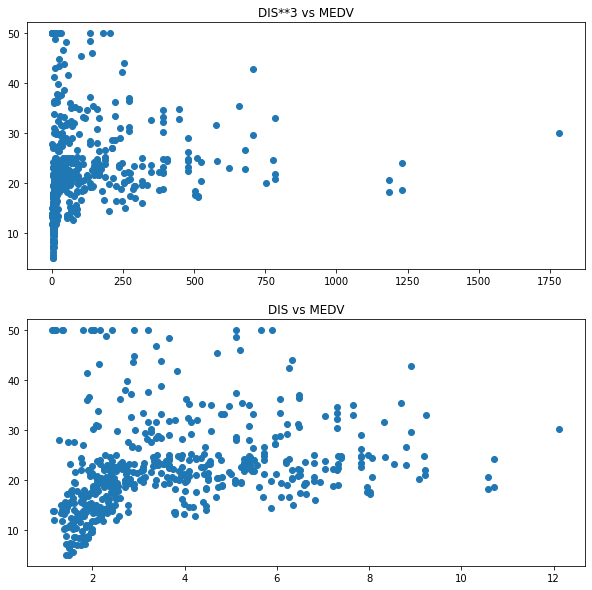

In [28]:
# create two subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

# plot DIS**3 vs MEDV
ax1.scatter(new_X['DIS**3'], boston_df['MEDV'])
ax1.set_title('DIS**3 vs MEDV')

# plot DIS vs MEDV
ax2.scatter(new_X['DIS'], boston_df['MEDV'])
ax2.set_title('DIS vs MEDV')


plt.show()

### Analysis of plots:
The only transformed features that seem to plot **more linearly** than the original feature is **1/DIS**.

This is quite surprising since my assumption was that a transformation that makes the feature more linear would be better, but autofeat has kept transformed features that are not more linear in relation to MEDV.

As well, the transformations of **DIS^3, 1/INDUS, and exp(RM) actually make the outliers larger**, which I would think creates a less accurate model for general data.

## Step 4: Use 1 Round of Transformed Features for Linear Regression
Take the transformed features created by autofeat and split into training and testing data.

Then perform linear regression and compare the results to the baseline of 0.71

In [29]:
# split the data from the new_X created from AutoRegressor
X_train, X_test, y_train, y_test = train_test_split(new_X, boston_df['MEDV'], test_size=0.3, random_state=10)

# check the number of rows are equal between X and y
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 15), (354,), (152, 15), (152,))

In [30]:
# instantiate linear regression model
lin_reg = LinearRegression()

# train the model
lin_reg.fit(X_train, y_train)

# get the training predictions
train_preds = lin_reg.predict(X_train)

# get the testing predictions
test_preds = lin_reg.predict(X_test)

# get R-squared for training
train_r2 = r2_score(y_train, train_preds)

# get R-squared for testing
test_r2 = r2_score(y_test, test_preds)

print(f'Training R-squared: {train_r2}')
print(f'Testing R-squared: {test_r2}')

Training R-squared: 0.7041231017132574
Testing R-squared: 0.7601047254617381


C:\Users\dagar\anaconda3\envs\btc_pred_py37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\dagar\anaconda3\envs\btc_pred_py37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\dagar\anaconda3\envs\btc_pred_py37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


## Analysis of the 1 step feature engineering

**The R-squared for the model increased from 0.71 for no feature engineering to 0.76 with feature engineering for the test data.**

Surprisingly, the model performed better on the testing data than on the training data. This would indicate that a certain level of regularization, or increased bias, was added into the model during training by using the transformed features.


## Step 5: Try Two Rounds of Feature Engineering

In [31]:
# instantiate an AutoFeatRegressor with two steps of feature engineering
feat_select = AutoFeatRegressor(verbose=1, feateng_steps=2)

new_X = feat_select.fit_transform(boston_df.iloc[:, :-2], boston_df['MEDV'])


[AutoFeat] The 2 step feature engineering process could generate up to 3003 features.
[AutoFeat] With 506 data points this new feature matrix would use about 0.01 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 50 transformed features from 11 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 1793 feature combinations from 1830 original feature tuples - done.
[feateng] Generated altogether 1845 new features in 2 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 747 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 64 features after 5 feature selection runs
[featsel] 50 features after correlation filtering
[featsel] 8 features after noise filtering
[A

In [32]:
# veiw the features engineered from autofeat
new_X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'RM**3/TAX', 'log(NOX)/DIS', 'RM**2/PTRATIO',
       'sqrt(CRIM)*NOX**3', 'CHAS*CRIM', 'RAD**3*exp(RM)', 'RM**3/NOX',
       'AGE**3*log(DIS)'],
      dtype='object')

In [33]:
# get a count of the new features created
len([x for x in new_X.columns if x not in boston_df.columns])

8

### There were 8 new features created and kept from the AutoFeatRegressor

## Step 6: Train and Test a Linear Regression model on the Newly Engineered Features

In [34]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(new_X, boston_df['MEDV'], test_size=0.3, random_state=10)

# instaniate the model
lin_reg = LinearRegression()

# train the model
lin_reg.fit(X_train, y_train)

# get predictions for the training data
train_preds = lin_reg.predict(X_train)

# get predictions for the testing data
test_preds = lin_reg.predict(X_test)

# get R-squared for training
train_r2 = r2_score(y_train, train_preds)

# get R-squared for testing
test_r2 = r2_score(y_test, test_preds)

print(f'Training R-squared: {train_r2}')
print(f'Testing R-squared: {test_r2}')

Training R-squared: 0.8003118252202299
Testing R-squared: 0.8375448404194059


C:\Users\dagar\anaconda3\envs\btc_pred_py37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\dagar\anaconda3\envs\btc_pred_py37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\dagar\anaconda3\envs\btc_pred_py37\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


## Analysis of the 2 Rounds of Feature Engineering Results:

**The R-squared improved again by doing more feature engineering, from 0.76 for one round of engineering to 0.84 with two rounds of engineering.**

Here the testing predictions were better than the training and so that indicates there is no overfitting  and overall there are quite close in value to each other.

## Step 7: Concluding Remarks

This notebook shows how by using autofeat, a data scientist can quickly and easily improve their model's performance especially using a simple model such as linear regression. What is most important is that autofeat creates new features through combining and transforming features beyond what a data scientist could do manually in a reasonable time. 

The first linear model using only the **features that looked linear** resulted in **testing R-squared of 0.66**

The linear model on the **raw data** resulted in **testing R-squared of 0.71**

The autofeat **FeatureSelector** was used to recommend features to be used and **narrowed the features from 12 features to 8 features**. The **testing R-squared was 0.71**. No improvement.

The autofeat **AutoRegressor** was used to create and try **feature engineering** using only **1-step** of the process. This resulted in **4 new features and 11 old features** being used. 
The **testing R-squared was 0.76.** An improvement.

Lastly, the autofeat **AutoRegressor** was used to create and try feature engineering using **2-steps** of the process. This resulted in **8 new features and 11 old features** being used.
The **testing R-squared was now 0.84**. A significant improvement.

Here we see how using feature engineering, especially through autofeat, allows for **quick improvement of a model's performance**. 

#### A simple linear regression model was used to teach a couple points:

    Most data does not have a strong linear relationship with the target and needs to be transformed to become more of a linear relationship

    Sometimes what we think will improve performance, such as the four linear features model with all the raw data, does not actually result in a better model than taking more non-linear features.
    
## Next Steps:

Next for the linear model would be to try to improve the model by **removing outliers**. By removing outliers, it **reduces the variance** and can **avoid overfitting on the training data**. This results in a **more generalized model that performs better on testing data.**

Next for general ML on this project would be to **try different ML models**. As stated above, the features are not showing a strong linear relationship with the target. This type of prediction might be better for a **Random Forest model for regression**. As well, a **deep learning model** could be created, but that would **require much more compute power** and if **a simple model fits good enough** the extra resources may not be worth it. So a **Random Forest with bagging and boosting** is the next best model to try.